#### Name: Omisha Nagaraju
#### Student ID: u3251969
#### Unit: Data Science Technology and Systems PG (11523)
#### Assignment-2: Flight Delay Prediction- ON CLOUD

# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). 

# Step 1: Prepare the environment 

Use one of the labs which we have practised on with the Amazon Sagemakers where you perform the following steps:
1. Start a lab.
2. Create a notebook instance and name it "oncloudproject".
3. Increase the used memory to 25 GB from the additional configurations.
4. Open Jupyter Lab and upload this notebook into it.
5. Upload the two combined CVS files (combined_csv_v1.csv and combined_csv_v2.csv), which you created in Part A of this project.

In [1]:
# Importing the required libraries
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
instance_type='ml.m4.xlarge'

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading the CSV files created using onpremises.ipynb
combined_csv_v1 = pd.read_csv('combined_csv_v1.csv')
combined_csv_v2 = pd.read_csv('combined_csv_v2.csv')

In [3]:
# Checking for counts of exact 0.0 and 1.0 before conversion
print("Counts before conversion to int-")
print(combined_csv_v1['target'].value_counts())

Counts before conversion to int-
0.0    1292258
1.0     343332
Name: target, dtype: int64


In [4]:
# Converting all values to integers
combined_csv_v1 = combined_csv_v1.astype(int)
combined_csv_v2 = combined_csv_v2.astype(int)

In [5]:
# Checking for counts of exact 0.0 and 1.0 before conversion
print("Counts after conversion to int-")
print(combined_csv_v1['target'].value_counts())

Counts after conversion to int-
0    1292258
1     343332
Name: target, dtype: int64


In [6]:
print("combined_csv_v1.csv-")
combined_csv_v1.head()

combined_csv_v1.csv-


,target,Distance,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,DepHourofDay_14,DepHourofDay_15,DepHourofDay_16,DepHourofDay_17,DepHourofDay_18,DepHourofDay_19,DepHourofDay_20,DepHourofDay_21,DepHourofDay_22,DepHourofDay_23
0,0,1464,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1464,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1464,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1464,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1464,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("\ncombined_csv_v2.csv-")
combined_csv_v2.head()


combined_csv_v2.csv-


,target,Distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,...,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday_True
0,0,1464,7,57,0,281,25,0,209,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1464,7,72,81,284,11,0,226,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1464,7,49,0,219,24,0,244,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1464,7,29,0,182,30,0,247,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1464,7,52,0,214,41,0,220,0,...,0,0,0,0,0,0,0,0,1,0


# Step 2: Build and evaluate simple models

Write code to perform the follwoing steps:
1. Split data into training, validation and testing sets (70% - 15% - 15%).
2. Use linear learner estimator to build a classifcation model.
3. Host the model on another instance
4. Perform batch transform to evaluate the model on testing data
5. Report the performance metrics that you see better test the model performance 

Note: You are required to perform the above steps on the two combined datasets separatey and to comments on the difference.

### 1. Splitting data into training, validation and testing sets (70% - 15% - 15%).

In [8]:
from sklearn.model_selection import train_test_split

# Function to split the dataset into 70% train, 15% test and 15% validation sets
def split(dataset):
    train, test_and_validate = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset['target'])
    test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['target'])
    return train, validate, test

#### a. combined_csv_v1

In [9]:
# Applying funtion to first dataset combined_csv_v1
train_1, validate_1, test_1 = split(combined_csv_v1)
print(train_1['target'].value_counts())
print(test_1['target'].value_counts())
print(validate_1['target'].value_counts())

0    904581
1    240332
Name: target, dtype: int64
0    193838
1     51500
Name: target, dtype: int64
0    193839
1     51500
Name: target, dtype: int64


#### b. combined_csv_v2

In [10]:
# Applying funtion to second dataset combined_csv_v2
train_2, validate_2, test_2 = split(combined_csv_v2)
print(train_2['target'].value_counts())
print(test_2['target'].value_counts())
print(validate_2['target'].value_counts())

0    904581
1    240332
Name: target, dtype: int64
0    193838
1     51500
Name: target, dtype: int64
0    193839
1     51500
Name: target, dtype: int64


### 2. Use linear learner estimator to build a classifcation model.

In [11]:
# Importing required libraries
import sagemaker
from sagemaker.serializers import CSVSerializer
from sagemaker.amazon.amazon_estimator import RecordSet
import boto3
import io

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


#### a. combined_csv_v1

In [12]:
# Initializing the LinearLearner estimator object
classifier_estimator_1 = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='binary_classifier',
                                               binary_classifier_model_selection_criteria='cross_entropy_loss')

In [13]:
# Creating training, test and validation records for combined_csv_1
train_record_1 = classifier_estimator_1.record_set(train_1.values[:, 1:].astype(np.float32), train_1.values[:, 0].astype(np.float32), channel='train')
val_record_1 = classifier_estimator_1.record_set(validate_1.values[:, 1:].astype(np.float32), validate_1.values[:, 0].astype(np.float32), channel='validation')
test_record_1 = classifier_estimator_1.record_set(test_1.values[:, 1:].astype(np.float32), test_1.values[:, 0].astype(np.float32), channel='test')

In [14]:
# Fitting the model on the first dataset
classifier_estimator_1.fit([train_record_1, val_record_1, test_record_1])

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-11-01-05-12-45-645


2024-11-01 05:12:46 Starting - Starting the training job...
2024-11-01 05:13:00 Starting - Preparing the instances for training...
2024-11-01 05:13:39 Downloading - Downloading input data...
2024-11-01 05:14:20 Downloading - Downloading the training image.........
2024-11-01 05:15:36 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/01/2024 05:15:57 INFO 139923751003968] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

In [15]:
# Evaluating model-1
sagemaker.analytics.TrainingJobAnalytics(classifier_estimator_1._current_job_name, 
                                         metric_names = ['test:objective_loss', 
                                                         'test:binary_f_beta',
                                                         'test:precision',
                                                         'test:recall']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:objective_loss,0.491824
1,0.0,test:binary_f_beta,0.009858
2,0.0,test:precision,0.585812
3,0.0,test:recall,0.004971


This model has moderate precision (58.5%) but very low recall (0.49%), meaning it correctly identifies only a small portion of actual delays. The low F-Beta score (0.01) suggests that while the model makes some accurate predictions, it misses most delays, showing we need to improve recall for better overall performance.

#### b. combined_csv_v2

In [16]:
# Initializing the LinearLearner estimator object
classifier_estimator_2 = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='binary_classifier',
                                               binary_classifier_model_selection_criteria='cross_entropy_loss')

In [17]:
# Creating training, test and validation records for combined_csv_2
train_record_2 = classifier_estimator_2.record_set(train_2.values[:, 1:].astype(np.float32), train_2.values[:, 0].astype(np.float32), channel='train')
val_record_2 = classifier_estimator_2.record_set(validate_2.values[:, 1:].astype(np.float32), validate_2.values[:, 0].astype(np.float32), channel='validation')
test_record_2 = classifier_estimator_2.record_set(test_2.values[:, 1:].astype(np.float32), test_2.values[:, 0].astype(np.float32), channel='test')

In [18]:
# Fitting the model on the second dataset
classifier_estimator_2.fit([train_record_2, val_record_2, test_record_2])

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-11-01-05-25-24-883


2024-11-01 05:25:26 Starting - Starting the training job...
2024-11-01 05:25:39 Starting - Preparing the instances for training...
2024-11-01 05:26:11 Downloading - Downloading input data......
2024-11-01 05:27:06 Downloading - Downloading the training image......
2024-11-01 05:28:02 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/01/2024 05:28:24 INFO 140156187363136] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss'

In [19]:
# Evaluating model-2
sagemaker.analytics.TrainingJobAnalytics(classifier_estimator_2._current_job_name, 
                                         metric_names = ['test:objective_loss', 
                                                         'test:binary_f_beta',
                                                         'test:precision',
                                                         'test:recall']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:objective_loss,0.480667
1,0.0,test:binary_f_beta,0.106738
2,0.0,test:precision,0.563579
3,0.0,test:recall,0.058951


The model has moderate precision (56%) but very low recall (5.9%), indicating it correctly predicts non delays but missies many non delays mostly caused by the skew in the target variable due to higher number of 0s or non delayed flights.

### 3. Host the model on another instance.

#### a. combined_csv_v1

In [20]:
linear_predictor_v1 = classifier_estimator_1.deploy(initial_instance_count=1,
                serializer = sagemaker.serializers.CSVSerializer(),
                instance_type='ml.m4.xlarge')

print("\nlinear_predictor_v1 model successfully deployed")

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2024-11-01-05-32-28-155
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-11-01-05-32-28-155
INFO:sagemaker:Creating endpoint with name linear-learner-2024-11-01-05-32-28-155


---------!
linear_predictor_v1 model successfully deployed


#### b. combined_csv_v2

In [21]:
linear_predictor_v2 = classifier_estimator_2.deploy(initial_instance_count=1,
                serializer = sagemaker.serializers.CSVSerializer(),
                instance_type='ml.m4.xlarge')

print("\nlinear_predictor_v2 model successfully deployed")

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2024-11-01-05-37-30-561
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-11-01-05-37-30-561
INFO:sagemaker:Creating endpoint with name linear-learner-2024-11-01-05-37-30-561


--------!
linear_predictor_v2 model successfully deployed


### 4. Perform batch transform to evaluate the model on testing data.

In [22]:
from sagemaker import get_execution_role
# Defining bucket and prefix
bucket = 'c135321a3429022l8105025t1w050518893611-labbucket-ohd0auo48tme'
prefix = 'flight_model'
s3_resource = boto3.Session().resource('s3')

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [23]:
# Saving and uploading data to an S3 bucket
def upload_s3(filename, folder, dataframe):
    # Convert to CSV format with no headers
    csv_buffer = io.StringIO()
    dataframe.to_csv(csv_buffer, header=False, index=False)
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())
    print(f"Uploaded {filename} to S3 at {prefix}/{folder}/{filename}")

In [24]:
# Function to perform batch transform
def batch_transform(test_data, estimator):
    # Removing labels
    batch_X = test_data.iloc[:, 1:].fillna(0)
    print("Shape of batch_X:", batch_X.shape)

    # Checking if batch_X still has any non-numeric values
    if not batch_X.applymap(lambda x: isinstance(x, (int, float))).all().all():
        raise ValueError("Error: `batch_X` contains non-numeric values.")

    # Uploading to S3
    batch_X_file = 'batch-in.csv'
    upload_s3(batch_X_file, 'batch-in', batch_X)

    # Validating file upload by checking the actual content on S3
    s3 = boto3.client('s3')
    uploaded_file = s3.get_object(Bucket=bucket, Key=f"{prefix}/batch-in/{batch_X_file}")
    print("Uploaded file-\n", uploaded_file['Body'].read(500).decode("utf-8"))

    # Defining batch input and output S3 locations
    batch_input = f"s3://{bucket}/{prefix}/batch-in/{batch_X_file}"
    batch_output = f"s3://{bucket}/{prefix}/batch-out/"

    # Setting up the transform job
    classifier_transformer = estimator.transformer(
        instance_count=1,
        instance_type='ml.m4.xlarge',
        strategy='MultiRecord',
        assemble_with='Line',
        output_path=batch_output
    )

    classifier_transformer.transform(
        data=batch_input,
        data_type='S3Prefix',
        content_type='text/csv',
        split_type='Line'
    )
    
    # Waiting for completion
    classifier_transformer.wait()

    # Retrieving output from S3
    output_prefix = f"{prefix}/batch-out/"
    print(f"Checking for output files in S3 path: {output_prefix}")

    # Checking objects in the output folder
    response = s3.list_objects_v2(Bucket=bucket, Prefix=output_prefix)
    if 'Contents' not in response:
        print(f"No files found in {output_prefix}")
        return

    # Confirming output file key
    for obj in response['Contents']:
        print("Found output file:", obj['Key'])

    output_key = f"{prefix}/batch-out/{batch_X_file}.out"
    print(f"Attempting to retrieve the output file: {output_key}")

    try:
        obj = s3.get_object(Bucket=bucket, Key=output_key)
    except s3.exceptions.NoSuchKey:
        print(f"Error: The output file '{output_key}' does not exist in S3.")
        raise

    # Parsing CSV output
    target_predicted_df = pd.read_csv(io.BytesIO(obj['Body'].read()), header=None)
    print("Sample predictions retrieved:\n", target_predicted_df.head())
    
    # Returning labels and predictions
    return test_data.iloc[:, 0], target_predicted_df[0]

#### a. combined_csv_v1

In [25]:
# Running batch transformation on the first dataset
test_labels_1, target_predicted_1 = batch_transform(test_1, classifier_estimator_1)

Shape of batch_X: (245338, 93)


INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.


Uploaded batch-in.csv to S3 at flight_model/batch-in/batch-in.csv
Uploaded file-
 641,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1337,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1337,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,


INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2024-11-01-05-42-50-329
INFO:sagemaker:Creating transform job with name: linear-learner-2024-11-01-05-42-51-200


...............................................Docker entrypoint called with argument(s): serve
Running default environment configuration script
[11/01/2024 05:50:46 INFO 140055374403392] Memory profiler is not enabled by the environment variable ENABLE_PROFILER.
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cons['type'] is 'ineq':
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:743: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(self.X_min) is not 0:
[11/01/2024 05:50:50 WARNING 140055374403392] Loggers have already been setup.
[11/01/2024 05:50:50 INFO 140055374403392] loaded entry point class algorithm.serve.server_config:config_api
[11/01/2024 05:50:50 INFO 140055374403392] loading entry points
[11/01/202

#### b. combined_csv_v2

In [26]:
# Running batch transformation on the second dataset
test_labels_2, target_predicted_2 = batch_transform(test_2, classifier_estimator_2)

Shape of batch_X: (245338, 85)


INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: linear-learner-2024-11-01-05-51-34-897


Uploaded batch-in.csv to S3 at flight_model/batch-in/batch-in.csv
Uploaded file-
 641,16,28,0,284,47,0,207,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1337,1,54,18,132,30,0,171,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1337,11,34,0,101,16,0,-163,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,


INFO:sagemaker:Creating transform job with name: linear-learner-2024-11-01-05-51-35-563


..............................................Docker entrypoint called with argument(s): serve
Running default environment configuration script
[11/01/2024 05:59:11 INFO 140128550266688] Memory profiler is not enabled by the environment variable ENABLE_PROFILER.
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cons['type'] is 'ineq':
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:743: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(self.X_min) is not 0:
Docker entrypoint called with argument(s): serve
Running default environment configuration script
[11/01/2024 05:59:11 INFO 140128550266688] Memory profiler is not enabled by the environment variable ENABLE_PROFILER.
/opt/amazon/lib/python3.8/site-packages/mxnet/

### 5. Report the performance metrics that you see better test the model performance. 

In [27]:
#Importing required libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
import json
import matplotlib.pyplot as plt
import re

# Function to parse predictions in json to numeric format
def parse_predictions(pred_series):
    parsed_predictions = []
    for item in pred_series:
        try:
            parsed_item = json.loads(item)['predicted_label']
        except (json.JSONDecodeError, TypeError):
            match = re.search(r"\d+", item)
            parsed_item = int(match.group()) if match else None
        parsed_predictions.append(parsed_item)
    return pd.Series(parsed_predictions)

# Parsing predictions to numeric format
target_predicted_1_numeric = parse_predictions(target_predicted_1)
target_predicted_2_numeric = parse_predictions(target_predicted_2)
# Check if all items were parsed correctly
print("Checking parsed predictions v1\n", target_predicted_1_numeric.head())
print("Checking parsed predictions v2\n", target_predicted_2_numeric.head())
# Function to plot confusion matrix
def plot_confusion_matrix(test_labels, target_predicted):
    matrix = confusion_matrix(test_labels, target_predicted)
    df_confusion = pd.DataFrame(matrix)
    colormap = sns.color_palette("BrBG", 10)
    sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()

Checking parsed predictions v1
 0    0
1    0
2    0
3    0
4    0
dtype: int64
Checking parsed predictions v2
 0    0
1    0
2    0
3    0
4    0
dtype: int64


In [28]:
# Function to print ROC Curve
def plot_roc(test, test_labels, target_predicted):
    # Ensure target_predicted contains binary predictions
    if not all(pred in [0, 1] for pred in target_predicted):
        raise ValueError("Predictions for ROC must be binary (0 or 1).")

    # Computing the confusion matrix values
    TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted).ravel()

    # Calculate various performance metrics
    Sensitivity = float(TP) / (TP + FN) * 100
    Specificity = float(TN) / (TN + FP) * 100
    Precision = float(TP) / (TP + FP) * 100
    NPV = float(TN) / (TN + FN) * 100
    FPR = float(FP) / (FP + TN) * 100
    FNR = float(FN) / (TP + FN) * 100
    FDR = float(FP) / (TP + FP) * 100
    ACC = float(TP + TN) / (TP + FP + FN + TN) * 100

    # Displaying the calculated metrics
    print("Sensitivity or TPR: ", Sensitivity, "%") 
    print("Specificity or TNR: ", Specificity, "%") 
    print("Precision: ", Precision, "%") 
    print("Negative Predictive Value: ", NPV, "%") 
    print("False Positive Rate: ", FPR, "%")
    print("False Negative Rate: ", FNR, "%") 
    print("False Discovery Rate: ", FDR, "%")
    print("Accuracy: ", ACC, "%")

    # Calculating ROC and AUC
    print("Validation AUC:", metrics.roc_auc_score(test_labels, target_predicted))
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    roc_auc = metrics.auc(fpr, tpr)

    # Checking for NaN or Inf values in thresholds
    thresholds = np.nan_to_num(thresholds, nan=0.0, posinf=1.0, neginf=0.0)

    # Plotting ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label='Area Under Curve = %0.2f)' % roc_auc, color="blue")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # Plot threshold values if they're valid
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, linestyle='dashed', color='red')
    ax2.set_ylabel('Threshold', color='red')
    ax2.set_ylim([min(thresholds), max(thresholds)])
    ax2.set_xlim([fpr[0], fpr[-1]])

    plt.show()

#### a. combined_csv_v1

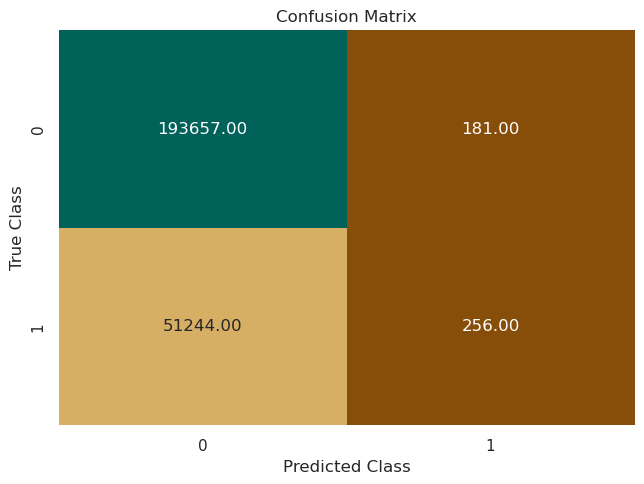

In [29]:
# Plot the confusion matrix
plot_confusion_matrix(test_labels_1, target_predicted_1_numeric)

True Negatives (193657): The model correctly predicted 0 (no delay) when the true class was 0 as well.

False Positives (181): The model incorrectly predicted 1 (delay) when the true class was 0.

False Negatives (51244): The model incorrectly predicted 0 (no delay) when the true class was 1.

True Positives (256): The model correctly predicted 1 (delay) when the true class was 1.

The model has high accuracy in predicting non-delayed flights but struggles to correctly identify delayed flights, as indicated by the large number of false negatives.

Sensitivity or TPR:  0.4970873786407767 %
Specificity or TNR:  99.90662305636666 %
Precision:  58.58123569794051 %
Negative Predictive Value:  79.07562647763791 %
False Positive Rate:  0.09337694363334331 %
False Negative Rate:  99.50291262135921 %
False Discovery Rate:  41.41876430205949 %
Accuracy:  79.039121538449 %
Validation AUC: 0.5020185521750372


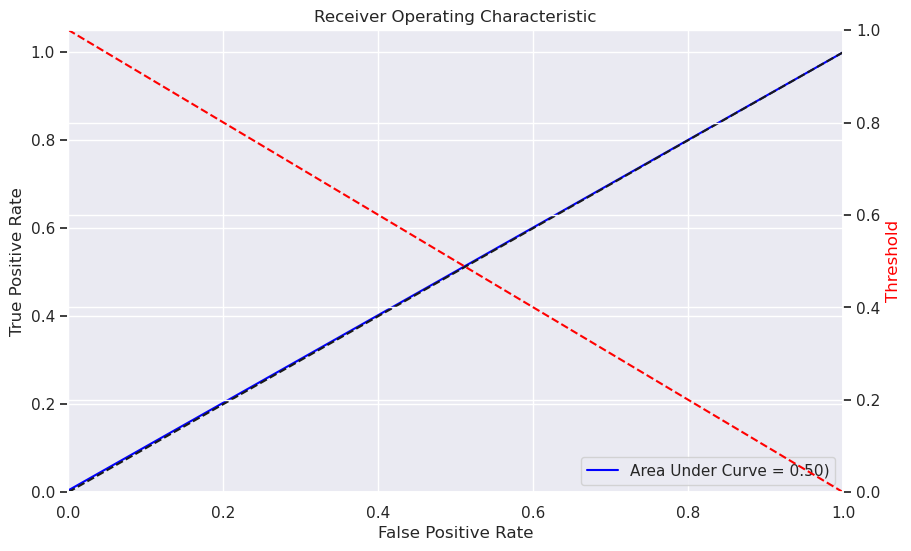

In [30]:
plot_roc(test_1, test_labels_1 , target_predicted_1_numeric)

Sensitivity (TPR): Very low at 0.5%, meaning it misses almost all true positives (delayed flights).

Specificity (TNR): High at 99.9%, meaning it correctly identifies most non-delayed flights.

Precision: Moderate at 58.6%, suggesting that slightly more than half of the positive predictions are correct.

Negative Predictive Value (NPV): High at 79.1%, indicating good accuracy in predicting non-delayed flights.

False Positive Rate (FPR): Very low at 0.09%, reflecting minimal misclassification of non-delayed flights.

False Negative Rate (FNR): Very high at 99.5%, showing that the model fails to detect almost all delays.

Accuracy: Decent overall at 79.0%, mostly due to correctly predicting non-delays.

#### b. combined_csv_v2

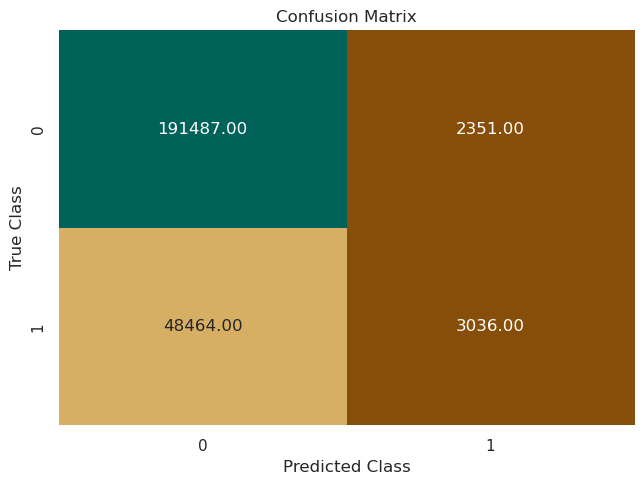

In [31]:
plot_confusion_matrix(test_labels_2 , target_predicted_2_numeric)

True Negatives (191487): Correctly predicted non-delays.

False Positives (2351): Incorrectly predicted delays for non-delayed flights.

False Negatives (48464): Missed delays, predicting non-delay instead.

True Positives (3036): Correctly identified delays.

The model performs well on non-delayed flights but struggles significantly with detecting delays, as indicated by the high number of false negatives. This suggests a need to improve recall for better delay prediction.

Sensitivity or TPR:  5.895145631067962 %
Specificity or TNR:  98.78713152219895 %
Precision:  56.35789864488584 %
Negative Predictive Value:  79.80254301919976 %
False Positive Rate:  1.2128684778010503 %
False Negative Rate:  94.10485436893204 %
False Discovery Rate:  43.642101355114164 %
Accuracy:  79.28775811329676 %
Validation AUC: 0.5234113857663345


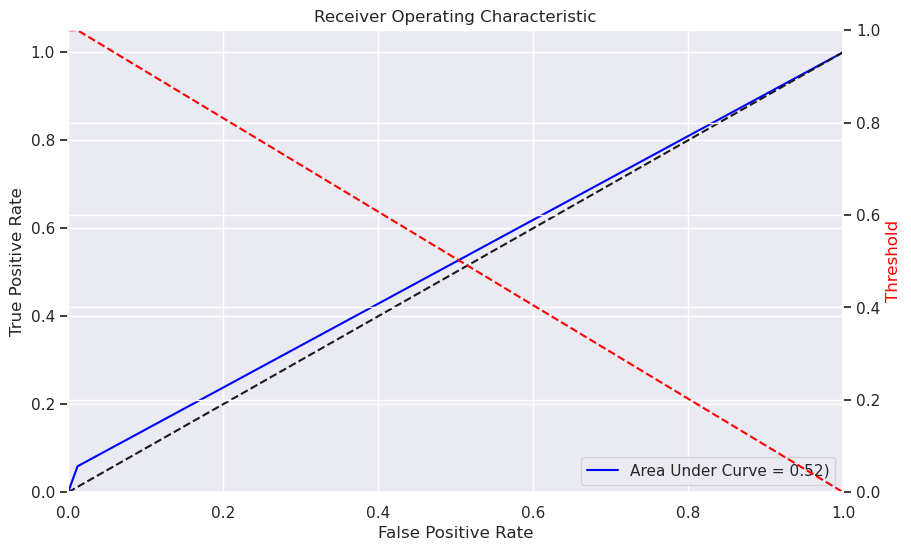

In [32]:
plot_roc(test_2, test_labels_2 , target_predicted_2_numeric)

Sensitivity (5.9%): Very low, meaning the model detects only a small fraction of actual delays.

Specificity (98.8%): High, effectively identifying non-delayed flights.

Precision (56.4%): Over half of the predicted delays are correct.

Accuracy (79.3%): Moderate, largely due to correct non-delay predictions.

High False Negative Rate (94.1%): Indicates the model misses most delays.

#### COMPARISON BETWEEN THE 2 MODELS
- Both models have comparable accuracy, with Model 2 built on combined_csv_v2 slightly performing better than Model 1 built on combined_csv_v1 (79.3% vs. 79.0%).
- Model 2 has a slightly higher AUC (0.52 vs. 0.50), indicating better overall classification performance than Model 1.
- Model 2 is a slight improvement over Model 1, mainly due to a higher recall and AUC, meaning it detects more actual delays and has marginally better overall classification performance. 
- However, both models still struggle greatly with recall, missing many delayed flights. 
- Further improvements in recall and overall model performance are needed to make either model useful for predicting flight delays effectively.


# Step 3: Build and evaluate ensembe models

Write code to perform the follwoing steps:
1. Split data into training, validation and testing sets (70% - 15% - 15%).
2. Use xgboost estimator to build a classifcation model.
3. Host the model on another instance
4. Perform batch transform to evaluate the model on testing data
5. Report the performance metrics that you see better test the model performance 
6. write down your observation on the difference between the performance of using the simple and ensemble models.
Note: You are required to perform the above steps on the two combined datasets separatey.

In [33]:
from sagemaker.image_uris import retrieve
session = sagemaker.Session()

# Retrieving the URI for the XGBoost container
container = retrieve('xgboost',boto3.Session().region_name,'1.0-1')
s3_output_location_1="s3://{}/{}/output_1/".format(bucket,prefix)
s3_output_location_2="s3://{}/{}/output_2/".format(bucket,prefix)

INFO:sagemaker.image_uris:Defaulting to only available Python version: py3
INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


### 2. Use xgboost estimator to build a classifcation model.

In [34]:
# Function to convert target score to binary class
def binary_convert(x):
    threshold = 0.55
    if x > threshold:
        return 1
    else:
        return 0

#### a. combined_csv_v1

In [35]:
# Defining the XGBoost estimator with SageMaker's Estimator class
xgb_1 = sagemaker.estimator.Estimator(container,
                                    role = sagemaker.get_execution_role(), 
                                    instance_count=1, 
                                    instance_type=instance_type,
                                    output_path=s3_output_location_1,
                                    sagemaker_session=session)

# Setting hyperparameters for the XGBoost model
xgb_1.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        eval_metric = "auc", 
                        num_round=100)

In [36]:
# Defining the file paths for the files
train_file_1='flight_train_1.csv'
test_file_1='flight_test_1.csv'
validate_file_1='flight_validate_1.csv'
whole_file_1='flight_1.csv'

In [38]:
# Uploading the training, testing, and validation datasets to S3
upload_s3(train_file_1, 'train_1', train_1)
upload_s3(test_file_1, 'test_1', test_1)
upload_s3(validate_file_1, 'validate_1', validate_1)

Uploaded flight_train_1.csv to S3 at flight_model/train_1/flight_train_1.csv
Uploaded flight_test_1.csv to S3 at flight_model/test_1/flight_test_1.csv
Uploaded flight_validate_1.csv to S3 at flight_model/validate_1/flight_validate_1.csv


In [39]:
# Defining the data channels for SageMaker

train_channel_1 = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/train_1/".format(bucket,prefix,train_file_1),
    content_type='text/csv')

validate_channel_1 = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/validate_1/".format(bucket,prefix,validate_file_1),
    content_type='text/csv')

# Creating a dictionary for input data channels
data_channels_1 = {'train': train_channel_1, 'validation': validate_channel_1}

In [40]:
# Starting the training job using the defined data channels for training and validation
xgb_1.fit(inputs=data_channels_1)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-11-01-06-04-05-395


2024-11-01 06:04:06 Starting - Starting the training job...
2024-11-01 06:04:22 Starting - Preparing the instances for training...
2024-11-01 06:04:55 Downloading - Downloading input data...
2024-11-01 06:05:35 Downloading - Downloading the training image......
2024-11-01 06:06:16 Training - Training image download completed. Training in progress.[2024-11-01 06:06:27.220 ip-10-0-192-67.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter eval_metric value auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:

#### b. combined_csv_v2

In [41]:
# Defining the XGBoost estimator with SageMaker's Estimator class
xgb_2 = sagemaker.estimator.Estimator(container,
                                    role = sagemaker.get_execution_role(), 
                                    instance_count=1, 
                                    instance_type=instance_type,
                                    output_path=s3_output_location_2,
                                    sagemaker_session=session)

# Setting hyperparameters for the XGBoost model
xgb_2.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        eval_metric = "auc", 
                        num_round=100)

In [42]:
train_file_2='flight_train_2.csv'
test_file_2='flight_test_2.csv'
validate_file_2='flight_validate_2.csv'
whole_file_2='flight_2.csv'

In [43]:
upload_s3(train_file_2, 'train_2', train_2)
upload_s3(test_file_2, 'test_2', test_2)
upload_s3(validate_file_2, 'validate_2', validate_2)

Uploaded flight_train_2.csv to S3 at flight_model/train_2/flight_train_2.csv
Uploaded flight_test_2.csv to S3 at flight_model/test_2/flight_test_2.csv
Uploaded flight_validate_2.csv to S3 at flight_model/validate_2/flight_validate_2.csv


In [44]:
# Printing the shapes of the train, test, and validate datasets
print("Train Data Shape:", train_2.shape)
print("Validate Data Shape:", validate_2.shape)
print("Test Data Shape:", test_2.shape)

Train Data Shape: (1144913, 86)
Validate Data Shape: (245339, 86)
Test Data Shape: (245338, 86)


In [45]:
train_channel_2 = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/train_2/".format(bucket,prefix,train_file_2),
    content_type='text/csv')

validate_channel_2 = sagemaker.inputs.TrainingInput(
    "s3://{}/{}/validate_2/".format(bucket,prefix,validate_file_2),
    content_type='text/csv')

data_channels_2 = {'train': train_channel_2, 'validation': validate_channel_2}

In [46]:
xgb_2.fit(inputs=data_channels_2)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-11-01-06-15-27-279


2024-11-01 06:15:30 Starting - Starting the training job......
2024-11-01 06:16:04 Starting - Preparing the instances for training......
2024-11-01 06:17:21 Downloading - Downloading input data......
2024-11-01 06:18:06 Downloading - Downloading the training image...
2024-11-01 06:18:57 Training - Training image download completed. Training in progress..[2024-11-01 06:19:03.918 ip-10-2-148-99.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter eval_metric value auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INF

### 3. Host the model on another instance.

#### a. combined_csv_v1

In [47]:
xgb_predictor_v1 = xgb_1.deploy(initial_instance_count=1,
                serializer = sagemaker.serializers.CSVSerializer(),
                instance_type='ml.m4.xlarge')

print("\nxgb_predictor_v1 model successfully deployed")

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-01-06-23-18-366
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-11-01-06-23-18-366
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-11-01-06-23-18-366


-------!
xgb_predictor_v1 model successfully deployed


#### b. combined_csv_v2

In [48]:
xgb_predictor_v2 = xgb_2.deploy(initial_instance_count=1,
                serializer = sagemaker.serializers.CSVSerializer(),
                instance_type='ml.m4.xlarge')

print("\nxgb_predictor_v2 model successfully deployed")

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-01-06-27-20-359
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-11-01-06-27-20-359
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-11-01-06-27-20-359


-------!
xgb_predictor_v2 model successfully deployed


### 4. Perform batch transform to evaluate the model on testing data.

In [49]:
batch_X_1 = test_1.iloc[:,1:]
batch_X_file_1='batch-in_1.csv'
upload_s3(batch_X_file_1, 'batch-in_1', batch_X_1)

Uploaded batch-in_1.csv to S3 at flight_model/batch-in_1/batch-in_1.csv


In [50]:
# Defining the bucket output path
batch_output_1 = "s3://{}/{}/batch-out_1/".format(bucket, prefix)
batch_input_1 = "s3://{}/{}/batch-in_1/{}".format(bucket, prefix, batch_X_file_1)

# Cleaning and preparing the batch data before uploading
# Ensuring all columns are numeric, dropping rows with NaN values created
batch_X_1 = batch_X_1.apply(pd.to_numeric, errors='coerce').dropna()

# Re-uploading cleaned data to S3
upload_s3(batch_X_file_1, 'batch-in_1', batch_X_1)

# Initializing the XGBoost transformer for batch inference
xgb_transformer_1 = xgb_1.transformer(
    instance_count=1,
    instance_type=instance_type,
    strategy='MultiRecord',
    assemble_with='Line',
    output_path=batch_output_1
)

# Running the batch transform job with the cleaned input data
xgb_transformer_1.transform(
    data=batch_input_1,
    data_type='S3Prefix',
    content_type='text/csv',
    split_type='Line'
)

# Waiting for the transform job to complete
xgb_transformer_1.wait()

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-01-06-32-14-744


Uploaded batch-in_1.csv to S3 at flight_model/batch-in_1/batch-in_1.csv


INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2024-11-01-06-32-15-421


.......................................
[2024-11-01:06:38:38:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:38:38:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:38:38:INFO] nginx config: 
worker_processes auto;
[2024-11-01:06:38:38:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:38:38:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:38:38:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|i

In [51]:
# Extracting predicted and true labels
s3 = boto3.client('s3')
obj_1 = s3.get_object(Bucket=bucket, Key="{}/batch-out_1/{}".format(prefix,'batch-in_1.csv.out'))
target_predicted_1 = pd.read_csv(io.BytesIO(obj_1['Body'].read()),',',names=['target'])
test_labels_1 = test_1.iloc[:,0]

In [52]:
print(target_predicted_1.head())
print("\n")
target_predicted_1['target'] = target_predicted_1['target'].apply(binary_convert)
print(target_predicted_1.head())

     target
0  0.256321
1  0.093881
2  0.193404
3  0.132426
4  0.191187


   target
0       0
1       0
2       0
3       0
4       0


#### b. combined_csv_v2

In [53]:
batch_X_2 = test_2.iloc[:,1:];
batch_X_file_2='batch-in_2.csv'
upload_s3(batch_X_file_2, 'batch-in_2', batch_X_2)

Uploaded batch-in_2.csv to S3 at flight_model/batch-in_2/batch-in_2.csv


In [54]:
# Defining the bucket output path
batch_output_2 = "s3://{}/{}/batch-out_2/".format(bucket, prefix)
batch_input_2 = "s3://{}/{}/batch-in_2/{}".format(bucket, prefix, batch_X_file_2)

# Cleaning and preparing the batch data before uploading
# Ensuring all columns are numeric, dropping rows with NaN values created
batch_X_2 = batch_X_2.apply(pd.to_numeric, errors='coerce').dropna()

# Re-uploading cleaned data to S3
upload_s3(batch_X_file_2, 'batch-in_2', batch_X_2)

# Initializing the XGBoost transformer for batch inference
xgb_transformer_2 = xgb_2.transformer(
    instance_count=1,
    instance_type=instance_type,
    strategy='MultiRecord',
    assemble_with='Line',
    output_path=batch_output_2
)

# Running the batch transform job with the cleaned input data
xgb_transformer_2.transform(
    data=batch_input_2,
    data_type='S3Prefix',
    content_type='text/csv',
    split_type='Line'
)

# Waiting for the transform job to complete
xgb_transformer_2.wait()

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-01-06-44-03-750


Uploaded batch-in_2.csv to S3 at flight_model/batch-in_2/batch-in_2.csv


INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2024-11-01-06-44-04-443


..........................................[2024-11-01:06:51:03:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:51:03:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:51:03:INFO] nginx config: 
worker_processes auto;
[2024-11-01:06:51:03:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:51:03:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-01:06:51:03:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_h

In [55]:
s3 = boto3.client('s3')
obj_2 = s3.get_object(Bucket=bucket, Key="{}/batch-out_2/{}".format(prefix,'batch-in_2.csv.out'))
target_predicted_2 = pd.read_csv(io.BytesIO(obj_2['Body'].read()),',',names=['target'])
test_labels_2 = test_2.iloc[:,0]

In [56]:
print(target_predicted_2.head())
target_predicted_2['target'] = target_predicted_2['target'].apply(binary_convert)
test_labels_2 = test_2.iloc[:,0]
print(target_predicted_2.head())

     target
0  0.163019
1  0.071666
2  0.212019
3  0.116984
4  0.559620
   target
0       0
1       0
2       0
3       0
4       1


### 5. Report the performance metrics that you see better test the model performance.

#### a. combined_csv_v1

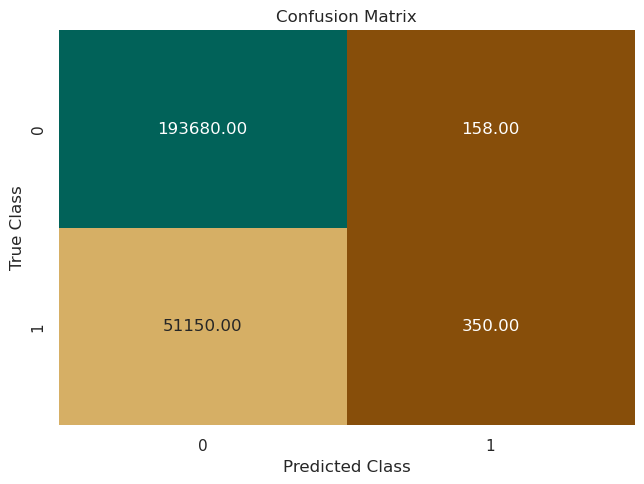

In [57]:
plot_confusion_matrix(test_labels_1 , target_predicted_1)

Sensitivity or TPR:  0.4970873786407767 %
Specificity or TNR:  99.90662305636666 %
Precision:  58.58123569794051 %
Negative Predictive Value:  79.07562647763791 %
False Positive Rate:  0.09337694363334331 %
False Negative Rate:  99.50291262135921 %
False Discovery Rate:  41.41876430205949 %
Accuracy:  79.039121538449 %
Validation AUC: 0.5020185521750372


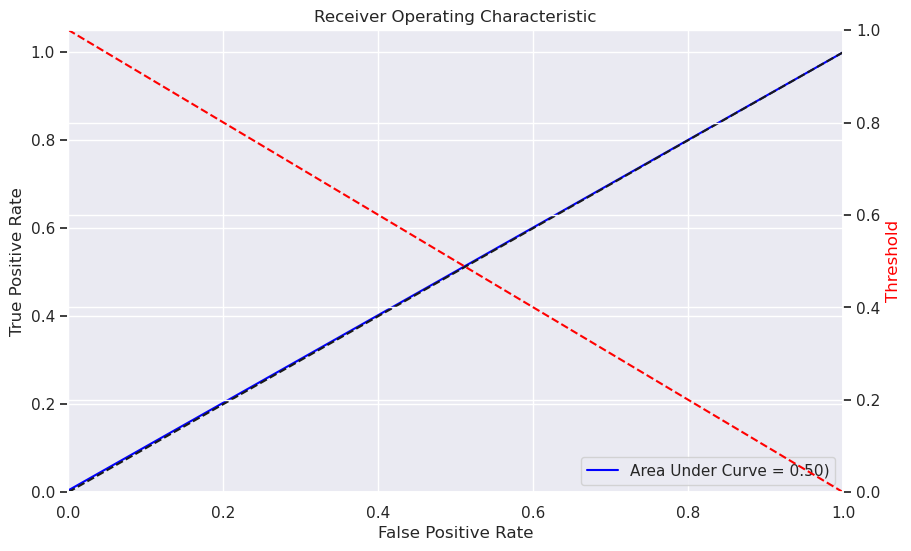

In [58]:
plot_roc(test_1, test_labels_1, target_predicted_1_numeric)

#### b. combined_csv_v2

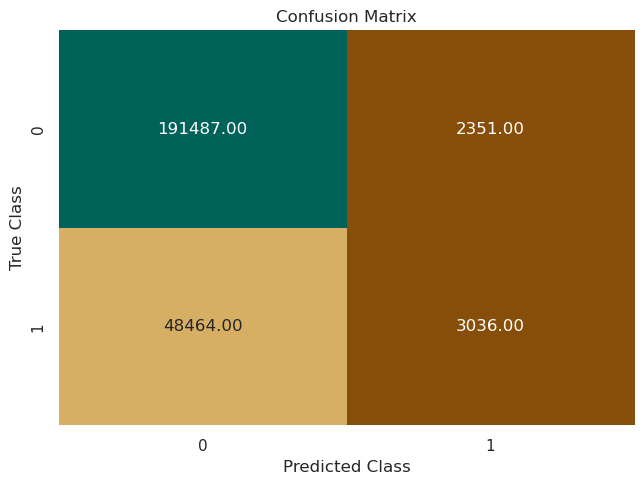

In [59]:
plot_confusion_matrix(test_labels_2 , target_predicted_2_numeric)

Sensitivity or TPR:  5.895145631067962 %
Specificity or TNR:  98.78713152219895 %
Precision:  56.35789864488584 %
Negative Predictive Value:  79.80254301919976 %
False Positive Rate:  1.2128684778010503 %
False Negative Rate:  94.10485436893204 %
False Discovery Rate:  43.642101355114164 %
Accuracy:  79.28775811329676 %
Validation AUC: 0.5234113857663345


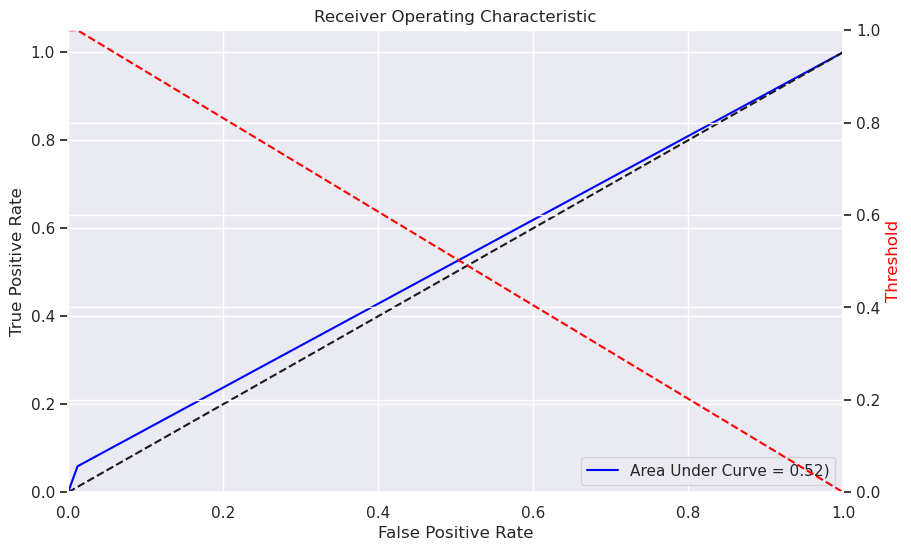

In [60]:
plot_roc(test_2, test_labels_2, target_predicted_2_numeric)

#### Deleing model instances hosted

In [61]:
linear_predictor_v1.delete_endpoint(delete_endpoint_config=True)

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-11-01-05-32-28-155
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-11-01-05-32-28-155


In [62]:
linear_predictor_v2.delete_endpoint(delete_endpoint_config=True)

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-11-01-05-37-30-561
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-11-01-05-37-30-561


In [63]:
xgb_predictor_v1.delete_endpoint(delete_endpoint_config=True)

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2024-11-01-06-23-18-366
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2024-11-01-06-23-18-366


In [64]:
xgb_predictor_v2.delete_endpoint(delete_endpoint_config=True)

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2024-11-01-06-27-20-359
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2024-11-01-06-27-20-359
